## 熵权法：客观求出各指标权重的方法，可以根据数据本身求出权重。
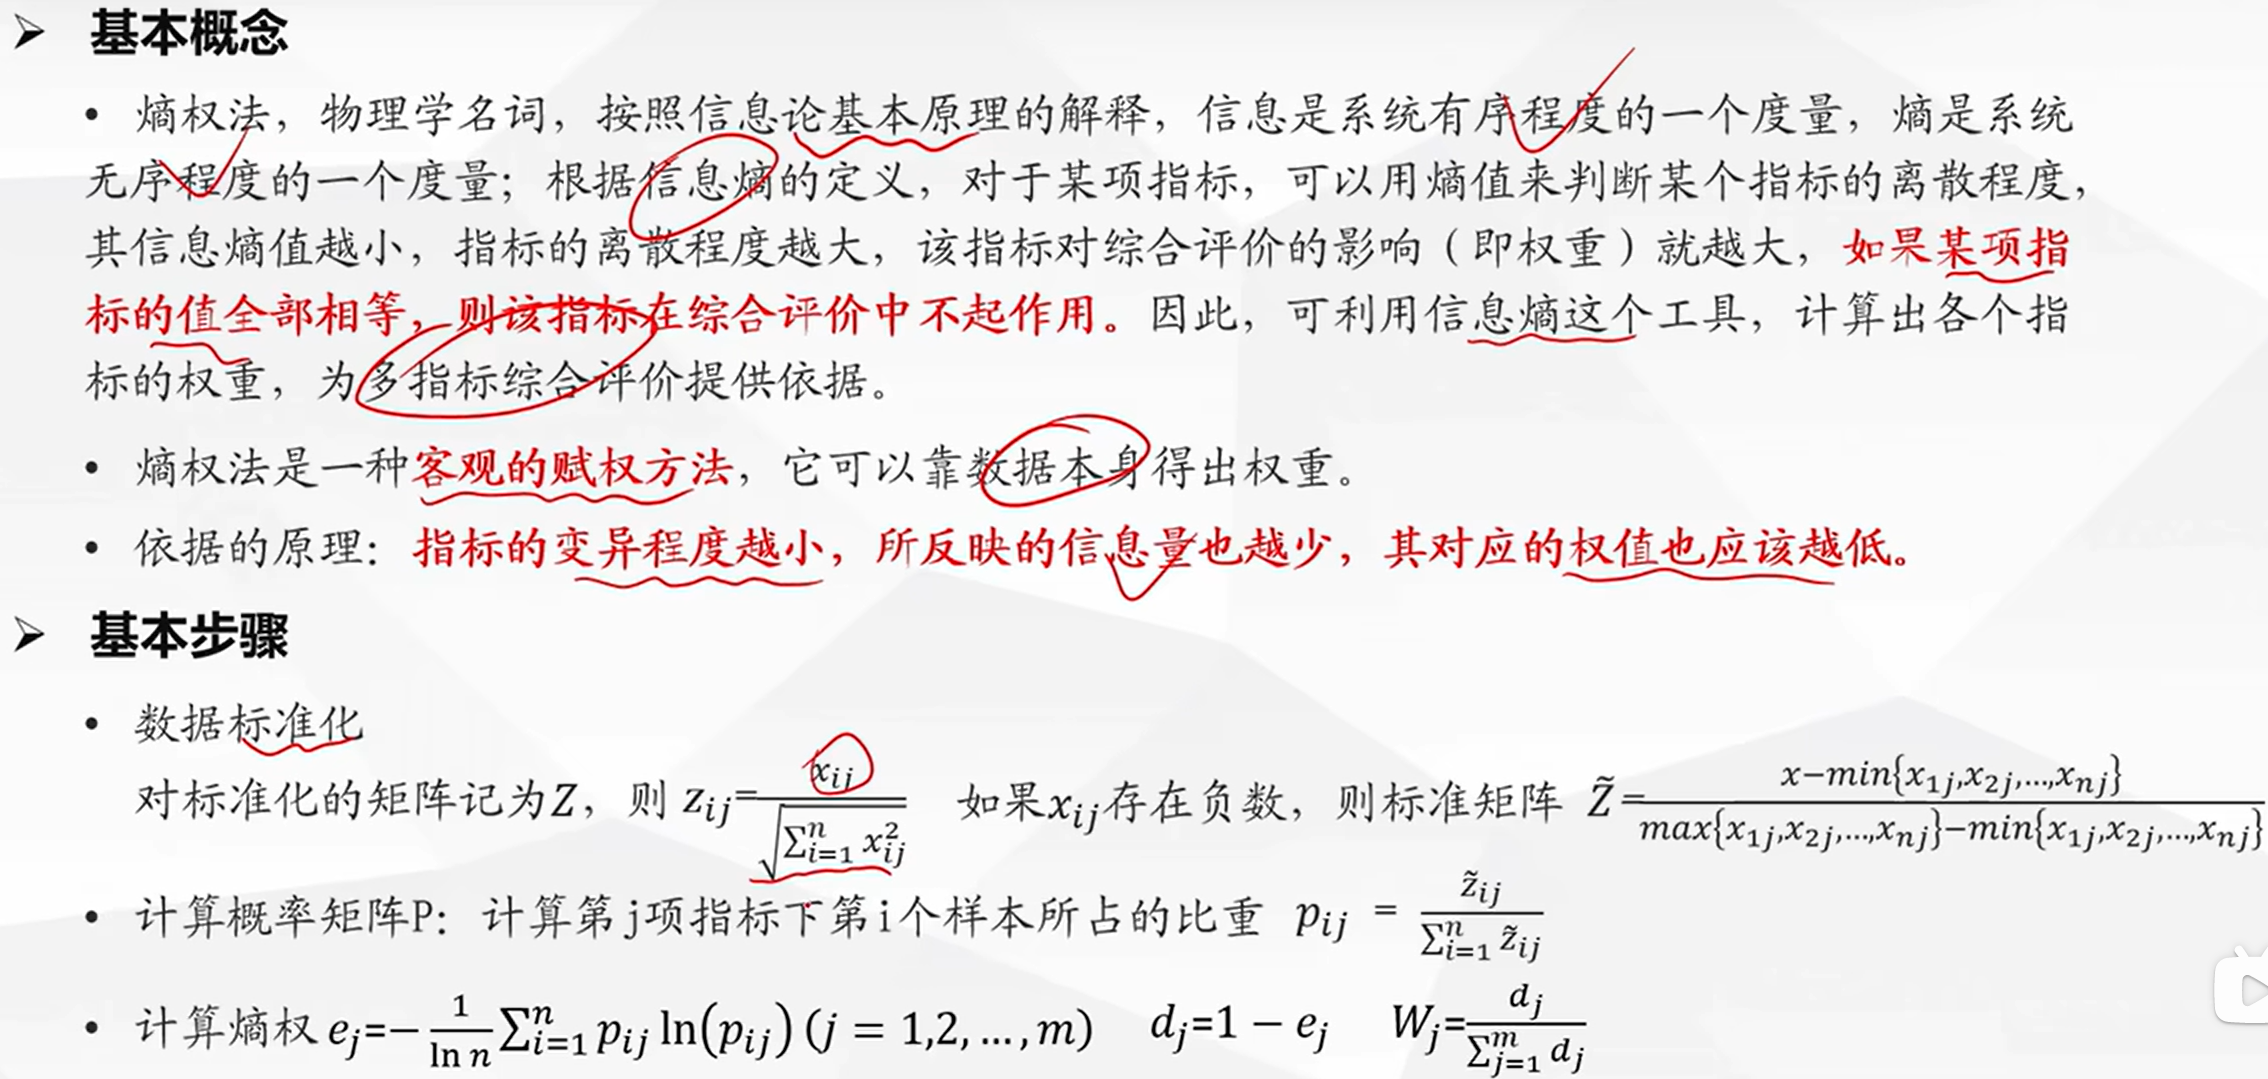

#### 注：一开始应对矩阵进行正向化（所有指标转化为极大型指标）

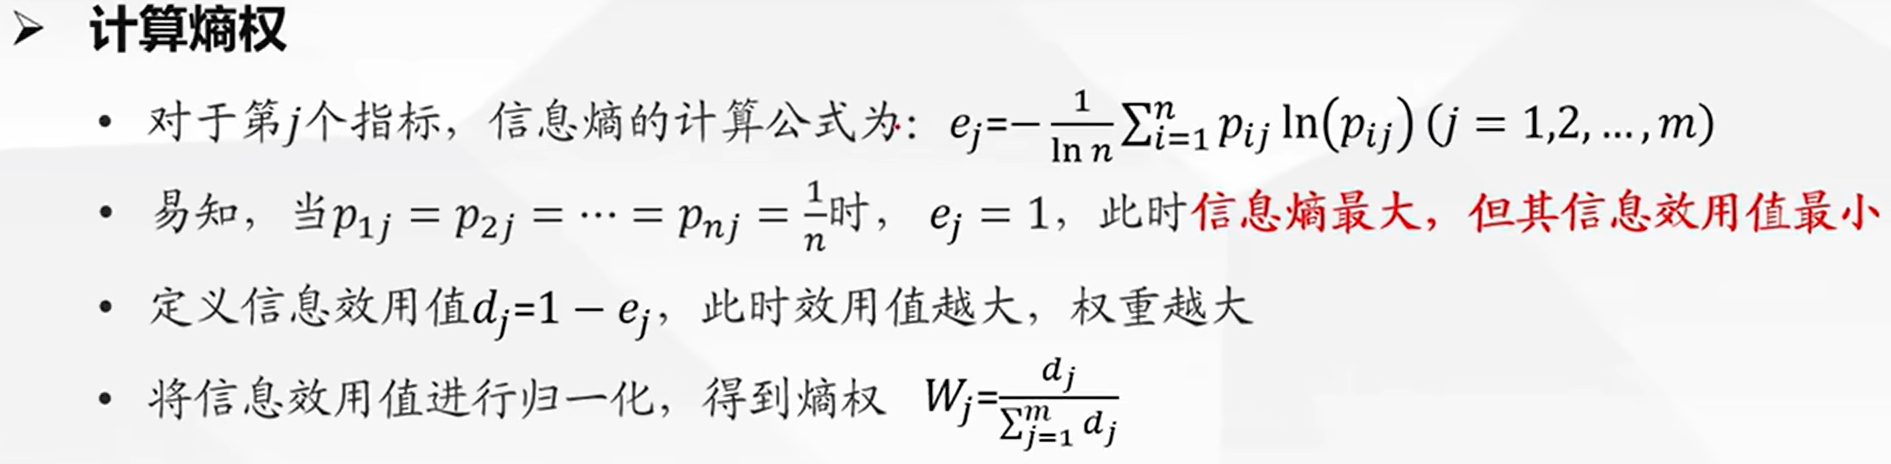

In [1]:
import numpy as np


# 定义一个自定义的对数函数mylog，用于处理输入数组中的零元素
def mylog(p):
    n = len(p) # 获取输入向量p的长度
    lnp = np.zeros(n)
    for i in range(n):
        if p[i] == 0:
            lnp[i] == 0 # log(0)未定义，自行规定为0
        else:
            lnp[i] = np.log(p[i])
    return lnp


# 定义一个指标矩阵X
X = np.array([[9, 0, 0, 0], [8, 3, 0.9, 0.5], [6, 7, 0.2, 1]])

# 对矩阵X进行标准化处理，得到标准化矩阵Z
Z = X / np.sqrt(np.sum(X*X, axis=0))
print("标准化矩阵Z = ", Z)

# 计算熵权所需的变量和矩阵初始化
n, m = Z.shape # 获取标准化矩阵Z的行和列
D = np.zeros(m) # 初始化数组D，用于保存每个指标的信息效用值

# 计算每个指标的信息效用值
for i in range(m):
    x = Z[:, i] # 获取Z的第i列，也就是第i个指标的所有数据
    p = x / np.sum(x) # 对每个指标进行归一化处理，得到概率分布p
    e = -np.sum(p * mylog(p)) / np.log(n) # 计算第i个指标的信息熵e
    D[i] = 1 - e # 计算第i个指标的信息效用值

# 根据信息效用值计算各指标的权重
weights = D / np.sum(D)  # 将信息效用值归一化，得到各指标权重
print("权重weights = ", weights)


标准化矩阵Z =  [[0.66896473 0.         0.         0.        ]
 [0.59463532 0.3939193  0.97618706 0.4472136 ]
 [0.44597649 0.91914503 0.21693046 0.89442719]]
权重weights =  [0.00856537 0.30716152 0.39326471 0.2910084 ]
